<center>
    <img src="https://images.credly.com/size/680x680/images/4a5f4849-54ae-461f-97ad-cb9c9a04eb63/Adv_Data_Science_Specialization.png" width="300" alt="cognitiveclass.ai logo" />
</center>


### Part 1  : Webscraping  to get  Borough and Neighborhood information
<ul>
<li>Import required libraries</li>
<li>Retreive the URL and creating a Beautiful soup object</li>
<li>Finding the table and table data</li>
<li>Create the dataframe with three columns "PostalCode, Borough, and Neighborhood</li>
<li>Use split ,strip and replace functions for getting Borough and Neighborhood information</li>
<li>Append each row to the dataframe</li>
<li>Print the number of rows of your dataframe.</li>
</ul>

In [1]:
# Import required libraries
import pandas as pd
import numpy  as np
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# Retreive the URL and creating a Beautiful soup object
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# Get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

# Create a BeautifulSoup object using the BeautifulSoup constructor
soup = BeautifulSoup(data, 'html5lib')

# Find all html tables in the web page
table = soup.find('table') 

# Create the dataframe with three columns "PostalCode, Borough, and Neighborhood"
table_contents = pd.DataFrame(columns=['Postalcode','Borough','Neighborhood'])

for row in table.findAll('td'):
    if row.span.text=='Not assigned':
         pass
    else:
        new_postalCode = row.p.text[:3]
        new_borough = (row.span.text).split('(')[0]
        new_neighborhood = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents = table_contents.append({"Postalcode":new_postalCode, "Borough":new_borough, "Neighborhood":new_neighborhood}, ignore_index=True)
        

In [48]:
# Show sample of the dataframe 
table_contents.head(20)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
# Check if there exist some rows with values 'Not assigned' in the variable 'Borough'
'Not assigned' in table_contents['Borough']


False

In [5]:
# Print the number of rows of your dataframe.
table_contents.shape

(103, 3)

### Part 2 : Geographical Co-ordinates
We add the latitude and the longitude coordinates of each neighborhood using : Geospatial_Coordinates.csv file.
<ul>
<li>Retreive the URL where to find the file 'Geospatial_Coordinates.csv'</li>
<li>Load the .csv file using 'pd.read_csv'</li>
<li>Rename the field 'Postal Code' to be able to merge </li>
<li>Merge both dataframe : table_contents and Geo_df  </li>
</ul>


In [6]:
# Load and prepare the dataframe Geo_df
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv"
Geo_df = pd.read_csv(url, usecols=['Postal Code', 'Latitude', 'Longitude'])
Geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
Geo_df.head()

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Using merge to make a left joint to combine both tables

In [7]:
# Left join between table_contents and Geo_df to add Latitude & Longitude
Geo_data = pd.merge(table_contents, Geo_df, on='Postalcode')
Geo_data.head(20)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Part 3 : Explore and cluster the neighborhoods
The goal is to explore and cluster the neighborhoods in <span style="color:red">Toronto</span>:
<ul>
<li>Reduice the scope, Now we will work only with boroughs that contain Toronto</li>
<li>Explore the neighborhoods and segment them</li>
<li>Define function to get geo location of address</li>
<li>Define a function for getting the venues </li>
<li>Define function to retieve ratings and likes of the venue </li>
<li>Define function to retievelist that contains italian resturants</li>
</ul>




In [8]:
# Reduice the scope, Now we will work only with boroughs that contain Toronto
toronto_data=Geo_data[Geo_data['Borough'].str.contains("Toronto")]
toronto_data = toronto_data.drop(['Postalcode'], axis = 1)
toronto_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,Downtown Toronto,St. James Town,43.651494,-79.375418
19,East Toronto,The Beaches,43.676357,-79.293031
20,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,Downtown Toronto,Christie,43.669542,-79.422564
30,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


In [44]:
# Use the Foursquare API to explore the neighborhoods and segment them : 

CLIENT_ID = '....' #  Foursquare ID
CLIENT_SECRET = '....' #  Foursquare Secret
VERSION = '20200424' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BBB441WVOKMI1SPHXB4PTKZVFNGI10VUPHEIXUN2C11PRRJQ
CLIENT_SECRET:WY1BIGDADRVPBBG2YS13QARUXQIM4AR1B3KEUOIALD4500KN


In [10]:
# Define function to get geo location of address : 
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [11]:
# Define a function for getting the venues : 
def get_venues(lat,lng):    
    #set variables
    radius=1000
    LIMIT=100
   
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [35]:
# Define function to retieve ratings and likes of the venue
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

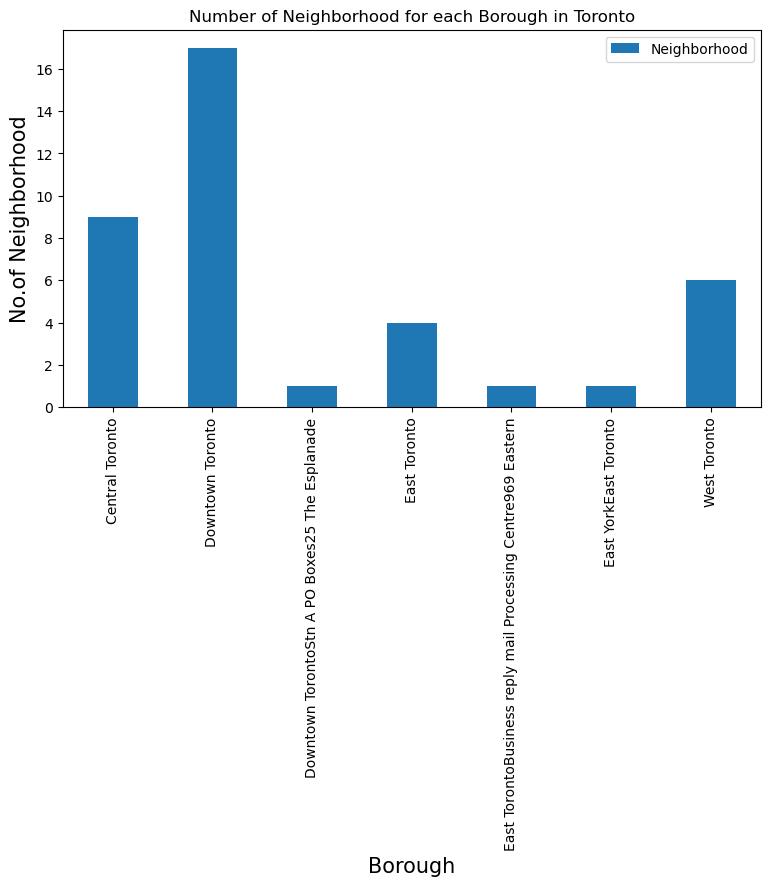

In [13]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
toronto_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [20]:
# Function to extract the list of neighborhood 
def get_rest_dataframe(geo_frame,type_resto):
    column_names=['Borough', 'Neighborhood', 'ID','Name']
    list_resto_to=pd.DataFrame(columns=column_names)
    for row in geo_frame.values.tolist():
        Borough, Neighborhood, Latitude, Longitude=row
        venues = get_venues(Latitude,Longitude)
        list_resto=venues[venues['Category']== type_resto]   
        for resturant_detail in list_resto.values.tolist():
            id, name , category=resturant_detail
            list_resto_to = list_resto_to.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood, 
                                            'ID': id,
                                            'Name' : name}, ignore_index=True)
    return list_resto_to

In [39]:
# Now we got all the italian restaurants in the Toronto City
italian_rest = get_rest_dataframe(toronto_data,'Italian Restaurant')
italian_rest.head()

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,"Regent Park, Harbourfront",4ad776eef964a520e20a21e3,Mangia and Bevi Resto-Bar
1,Downtown Toronto,"Regent Park, Harbourfront",4cbdc6784495721ea262617a,Fusaro's
2,Downtown Toronto,"Regent Park, Harbourfront",56d8dff7498eb4e5e661e78d,Ardo
3,Downtown Toronto,"Garden District, Ryerson",4b49183ff964a520a46526e3,Terroni
4,Downtown Toronto,"Garden District, Ryerson",4cbdc6784495721ea262617a,Fusaro's


In [40]:
italian_rest.shape

(86, 4)

We got <span style="color:red">86</span> Italian Resturants across Toronto City

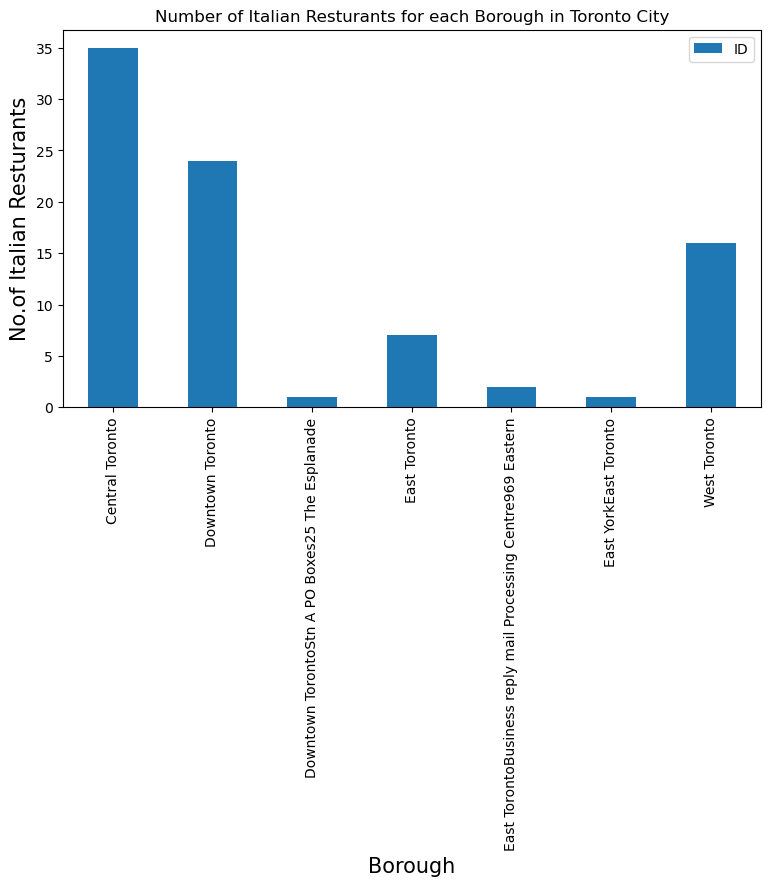

In [27]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Italian Resturants for each Borough in Toronto City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that  <span style="color:red">central toronto</span>  has the largest number of italian resturants

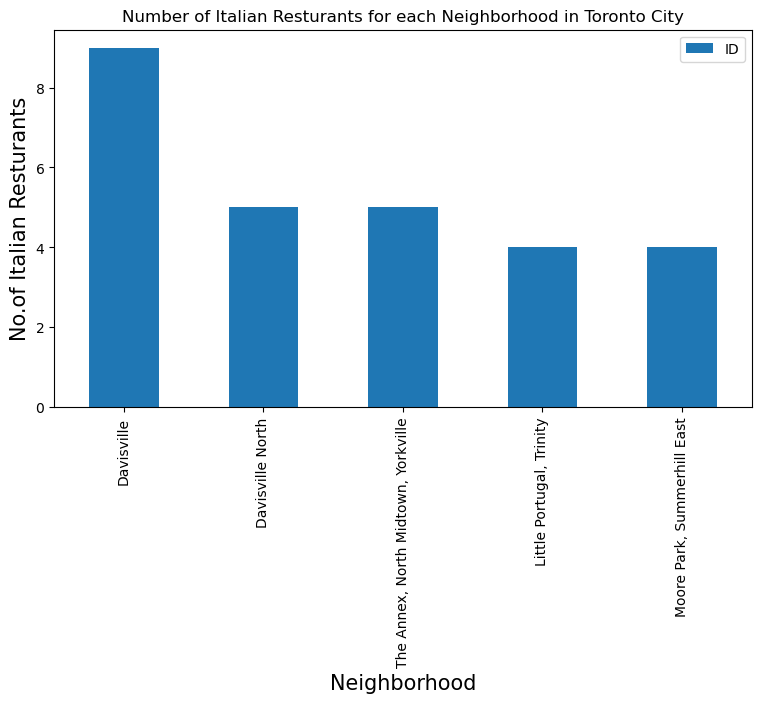

In [26]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Italian Resturants for each Neighborhood in Toronto City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

From Above we can observe the Neighborhood named   <span style="color:red"> Davisille</span>  has most number of Italian Restaurants. 

In [42]:
# Function to compute some metrics
def get_rest_metric(list_rest):
    #prepare neighborhood list that contains indian resturants
    column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
    italian_rest_metric=pd.DataFrame(columns=column_names)
    for row in list_rest.values.tolist():
        Borough,Neighborhood,ID,Name=row
        try:
            venue_details=get_venue_details(ID)
            id,name,likes,rating,tips=venue_details.values.tolist()[0]
        except IndexError:
            # we will assign 0 value for these resturants as they may have been 
            #recently opened or details does not exist in FourSquare Database
            id,name,likes,rating,tips=[0]*5
        italian_rest_metric = italian_rest_metric.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips
                                                   }, ignore_index=True)
    return italian_rest_metric

In [ ]:
italian_rest_metric = get_rest_metric(italian_rest)
italian_rest_metric[['Likes','Tips']]=italian_rest_metric[['Likes','Tips']].astype('float64')
italian_rest_metric.head()

In [ ]:
to_neighborhood_stats=italian_rest_metric.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
to_neighborhood_stats.columns=['Neighborhood','Average Rating']
to_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)


In [ ]:
to_borough_stats=italian_rest_metric.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
to_borough_stats.columns=['Borough','Average Rating']
to_borough_stats.sort_values(['Average Rating'],ascending=False).head()


In [ ]:

plt.figure(figsize=(10,7), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
italian_rest_metric.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [ ]:
to_neighborhood_stats=to_neighborhood_stats[to_neighborhood_stats['Average Rating']>=6.0]
to_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head()


In [ ]:
to_neighborhood_stats=pd.merge(to_neighborhood_stats,toronto_data, on='Neighborhood')
to_neighborhood_stats=to_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
to_neighborhood_stats

### END